In [57]:
#import the necessary libraries to analyze the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

def compute_Isc(df):
    I_sc = []
    col_names = list(df)
    #find the index of the cell that is closest to 0 for column 1
    for i in range(0, 3):
        I_sc.append(df[col_names[2*i+1]][df[col_names[2*i]].sub(0).abs().idxmin()])
    print(I_sc)
    return I_sc

def compute_Voc(df):
    V_oc = []
    col_names = list(df)
    #find the index of the cell that is closest to 0 for column 1
    for i in range(0, 3):
        V_oc.append(df[col_names[2*i]][df[col_names[2*i+1]].sub(0).abs().idxmin()])
    print(V_oc)
    return V_oc

def read_eff_from_excel(path, file):
    df_ = pd.read_excel(path + "\\" + file , sheet_name=0, usecols="C:H")
    #remove the rows with nan
    df_ = df_.dropna()
    #reset the index
    df_ = df_.reset_index(drop=True)
    #drop rows 0:4
    df_ = df_.drop(df_.index[0:7])
    df_ = df_.reset_index(drop=True)

    col_names = list(df_)
    new_col_names = ["#cell", "A", "J", "V", "FF", "Eff"]

    #rename the columns 
    df_.rename(columns={col_names[0]: new_col_names[0], col_names[1]: new_col_names[1], col_names[2]: new_col_names[2], col_names[3]: new_col_names[3], 
                     col_names[4]: new_col_names[4], col_names[5]: new_col_names[5]}, inplace=True)
    return df_


def simplify_name(str):
    #remove the .xls
    str = str[:-4]
    #remove the "-"
    str = str.replace("-", "")
    return str


def get_charac_df(path):
    files = os.listdir(path)
    name_sample = []
    efficiencies = []
    Isc = []
    Voc = []
    FF = []

    #for each file in the folder, read the data from the excel usin the function read_eff_from_excel
    for file in files:
        #if the file name containts ".xls"
        if ".xls" in file:
            name_sample.append(simplify_name(file))
            df_eff = read_eff_from_excel(path, file)
            efficiencies.append(df_eff["Eff"].max())
            Isc.append(df_eff["J"].max())
            Voc.append(df_eff["V"].max())
            FF.append(df_eff["FF"].max())

    #make a dataframe with the name of the sample as the first row
    df_eff = pd.DataFrame(columns=name_sample)
    df_eff.loc[len(df_eff)] = efficiencies
    df_eff.loc[len(df_eff)] = Isc
    df_eff.loc[len(df_eff)] = Voc
    df_eff.loc[len(df_eff)] = FF
    df_eff.rename(index={0: "Eff", 1: "Isc [mA/cm2]", 2: "Voc [mV]", 3:"FF %"}, inplace=True)

    #drop the columns with "TEST" in the name
    df_eff = df_eff.drop(df_eff.columns[df_eff.columns.str.contains('TEST',case = False)],axis = 1)
    return df_eff

In [28]:
#set the path to the folder containing the excel files
path = "JV\jv - 2_2"
file = "Dodecyl-2-1.xls"

#read the data from the excel file from the path, and store it in a dataframe
#use column BA until BF
df = pd.read_excel(path + "\\" + file , sheet_name=1, usecols="BA:BF", skiprows=[0, 1, 2, 3])
col_names = list(df)
new_col_names = ["V_1", "I_1", "V_2", "I_2", "V_3", "I_3"]

df.rename(columns={col_names[0]: new_col_names[0], col_names[1]: new_col_names[1], col_names[2]: new_col_names[2], col_names[3]: new_col_names[3], 
                   col_names[4]: new_col_names[4], col_names[5]: new_col_names[5]}, inplace=True)

#read data from the same excel file, but from C7 to H9
df_1 = pd.read_excel(path + "\\" + file , sheet_name=1, usecols="C:H")
#remove the rows with nan
df_1 = df_1.dropna()
#reset the index
df_1 = df_1.reset_index(drop=True)
#drop rows 0:4
df_1 = df_1.drop(df_1.index[0:6])
df_1 = df_1.reset_index(drop=True)

col_names = list(df_1)
new_col_names = ["#cell", "A", "J", "V", "FF", "Eff"]

#rename the columns 
df_1.rename(columns={col_names[0]: new_col_names[0], col_names[1]: new_col_names[1], col_names[2]: new_col_names[2], col_names[3]: new_col_names[3], 
                     col_names[4]: new_col_names[4], col_names[5]: new_col_names[5]}, inplace=True)

In [29]:
I_sc = compute_Isc(df)
V_oc = compute_Voc(df)

[-11.7726, -12.4015, -10.1663]
[562.416, 570.805, 403.02]


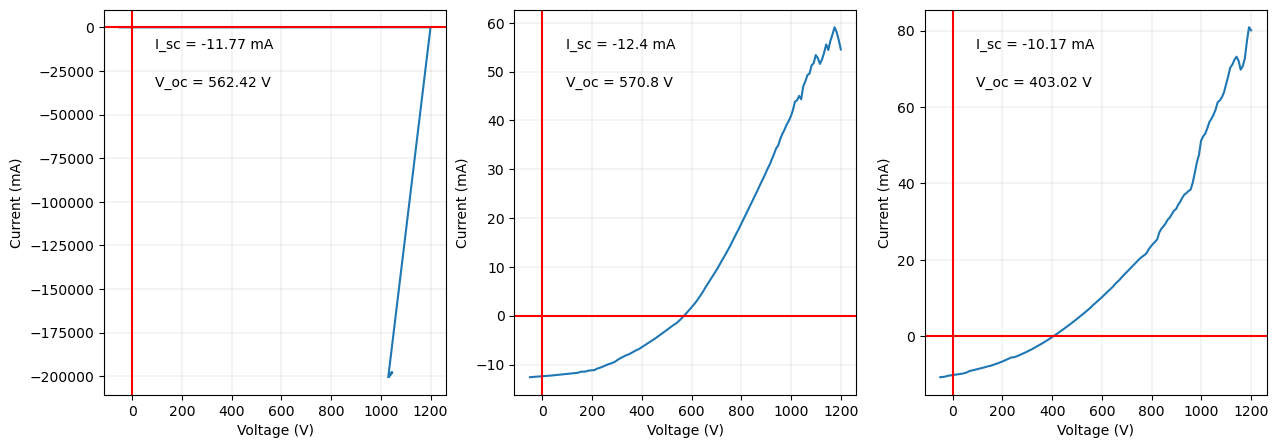

In [30]:
#make three plots, one for each voltage and current
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(df["V_1"], df["I_1"])
ax[1].plot(df["V_2"], df["I_2"])
ax[2].plot(df["V_3"], df["I_3"])
for i in range(3):
    ax[i].set_xlabel("Voltage (V)")
    ax[i].set_ylabel("Current (mA)")
    #add a light grid to the plot
    ax[i].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax[i].axhline(y=0, color='r')
    ax[i].axvline(x=0, color='r')
    #write the values of the short circuit current and open circuit voltage on the plot
    ax[i].text(0.15, 0.9, "I_sc = " + str(round(I_sc[i], 2)) + " mA", transform=ax[i].transAxes)
    ax[i].text(0.15, 0.8, "V_oc = " + str(round(V_oc[i], 2)) + " V", transform=ax[i].transAxes)

In [58]:
path = "JV\jv - 2"

df_eff = get_charac_df(path)
df_eff

,DKDH11,DKDH12,DKDH21,DKDH22,DKDH31,DKDH32,DKTH1,DKTH31,DKTH32,TKDH21,TKDH22,TKDH31,TKDK3
Eff,3.608389,3.809317,3.230767,3.688451,3.550197,3.436955,1.143727,4.250349,4.309536,4.730467,4.861506,3.852155,4.490032
Isc [mA/cm2],16.980170,16.847160,15.635000,15.391480,16.068620,15.788470,40.116640,15.792330,15.640710,14.478030,14.525050,16.243980,14.445850
Voc [mV],512.032900,518.710100,452.941800,522.302100,514.613800,507.104000,114.119900,554.518900,562.835200,700.962600,724.975700,773.651300,572.862800
FF %,43.316260,43.719930,45.621060,45.881960,43.843420,44.561100,25.002310,48.535780,48.954530,51.127500,52.307890,37.758080,55.642160


In [59]:
path = "JV\jv - 2_2"

df_eff = get_charac_df(path)
df_eff

,Dodecyl11,Dodecyl21,DPPP1,DPPP2,DPPPMeO2,Me4DPPP,Ref21,Ref3,THTKwashed,Tricyclo1,Tricyclo2
Eff,3.055132,2.052604,1.682758,2.067761,2.277853,0.956096,2.656563,2.023533,0.949492,2.575819,1.476403
Isc [mA/cm2],17.913290,15.214720,14.040990,12.042360,16.772230,11.786910,16.693840,16.074630,6.713360,16.151280,14.831250
Voc [mV],502.440800,509.161800,467.996200,437.616300,410.883100,279.094400,516.579600,392.588600,288253.100000,456.321900,364.192400
FF %,34.025310,26.671770,28.185580,39.236940,34.857040,30.379170,35.944640,35.149990,23.502360,35.588210,31.316650


In [60]:
path = "JV\jv - 1"

df_eff = get_charac_df(path)
df_eff

,dkdh1,dkdh2,dkdh3,dkth1,dkth2,dkth3,tkdh1,tkdh2,tkdh2_2,tkdh3,tkth1,tkth2
Eff,0.328365,0.370064,0.110490,2.222953,0.871603,1.902872,1.167017,5.739534,6.178978,0.710045,0.967184,3.624706
Isc [mA/cm2],3.466555,5.364505,1.800424,14.769030,10.521610,15.350990,12.596940,16.216760,15.576240,9.260010,6.873659,15.829870
Voc [mV],453.584400,361.365900,371.991000,597.134100,415.870700,632.999200,565.789800,842.389400,876.692900,652.690000,888.480900,701.159200
FF %,24.848450,19.089740,16.639840,25.206150,19.919490,19.987240,30.705510,44.058960,45.248740,25.053140,30.442900,37.537980
